author: okryzhan vprypesh

In [1]:
import numpy as np
import matplotlib.pyplot as mp

In [2]:
np.random.rand(5, 5)

array([[0.38601373, 0.48236303, 0.07853323, 0.70779793, 0.44436028],
       [0.54554251, 0.47088543, 0.65951274, 0.00692447, 0.3470799 ],
       [0.32316373, 0.66264536, 0.79402721, 0.82321486, 0.86675316],
       [0.15558408, 0.13066642, 0.77378071, 0.17069553, 0.79112036],
       [0.67028506, 0.2096069 , 0.83285156, 0.05381262, 0.42570864]])

In [3]:
a = np.arange(12)
a.reshape(4, 3)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [4]:
def incr_arr(n):
        return np.linspace(0, 1, n).reshape(1, n)

incr_arr(5).shape

(1, 5)

In [5]:
z = np.random.rand(10, 12)
z1 = z[0:5, 8:]

(20, 100)


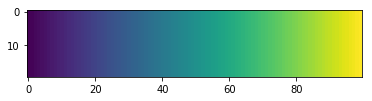

In [6]:
n, m = 100, 20
res = incr_arr(n)
for i in range(1, m):
    res = np.concatenate((res, incr_arr(n)), axis=0)
print(res.shape)
mp.imshow(res)

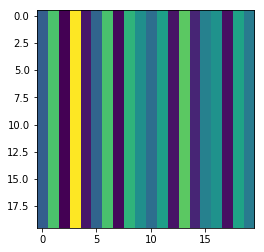

In [7]:
def rand_arr(n):
    return np.random.rand(n).reshape(1, n)

matrix = rand_arr(m)
for i in range(1, n):
    matrix = np.concatenate((matrix, rand_arr(m)), axis=0)
mult = res @ matrix
mp.imshow(mult)

Part II

In [42]:
def halk(img):
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            tmp = img[row, col, 0]
            img[row, col, 0] = img[row, col, 1]
            img[row, col, 1] = tmp
    return img

def smurf(img):
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            tmp = img[row, col, 0]
            img[row, col, 0] = img[row, col, 2]
            img[row, col, 2] = tmp
    return img

In [43]:
def distance(x1, x2, y1, y2):
    xx = (x2 - x1) ** 2
    yy = (y2 - y1) ** 2
    return (np.sqrt(xx + yy))

In [71]:
def check_colors(img):
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            for i in range(3):
                img[row, col, i] = 1 if img[row, col, i] > 1 else img[row, col, i]
                img[row, col, i] = 0 if img[row, col, i] < 0 else img[row, col, i]
    return img

In [70]:
def Vignette(img, rad_div, hardness):
    height, width = img.shape[:2]
    center = (width / 2, height / 2)
    rad = center[0] if center[0] < center[1] else center[1]
    rad /= rad_div
    for row in range(height):
        for col in range(width):
            r, g, b = img[row, col, :3] * 255
            dist = distance(center[0], col, center[1], row)
            if (dist > rad):
                dif = (dist - rad) * hardness
                r -= dif
                g -= dif
                b -= dif
                if (r < 0):
                    img[row, col, 0] = 0
                else:
                    img[row, col, 0] = r / 255
                if (g < 0):
                    img[row, col, 1] = 0
                else:
                    img[row, col, 1] = g / 255
                if (b < 0):
                    img[row, col, 2] = 0
                else:
                    img[row, col, 2] = b / 255
    img = check_colors(img)
    return img

In [80]:
def Amaro(img, hardness):
    height, width = img.shape[:2]
    center = (width / 2, height / 2)
    rad = center[0] if center[0] < center[1] else center[1]
    for row in range(height):
        for col in range(width):
            r, g, b = img[row, col, :3] * 255
            dist = distance(center[0], col, center[1], row)
            if (dist < rad):
                for i in range(3)
                    img[row, col, i] *= 1.1
                    if img[row, col, i] > 1
                        img[row, col, i] = 1
#     img = check_colors(img)
#     Vignette(img, 2, hardness)
    return img

SyntaxError: invalid syntax (<ipython-input-80-0c76fa631b65>, line 10)

In [58]:
def Hudson(img):
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            img[row, col, 0] = img[row, col, 0] + 0.01
            img[row, col, 1] = img[row, col, 1] + 0.1
            img[row, col, 2] = img[row, col, 2] + 0.15
    check_colors(img)
    Vignette(img, 2, 0.6)
    return img

In [82]:
def f_1977(img):
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            img[row, col, 0] *= 1.5
            img[row, col, 2] *= 1.1
    return np.clip((img / 2.1 + 0.07) * 2 - 0.08, 0, 1)

In [178]:
def Kelvin(img):
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            img[row, col, 0] *= 1.7
            img[row, col, 1] *= 1.2
            img[row, col, 2] *= 0.5
    return np.clip((img / 2 + 0.08) * 1.7, 0, 1)

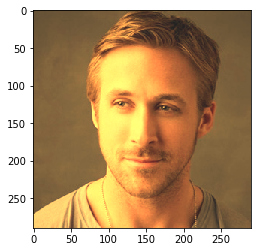

In [179]:
sund = mp.imread('img.png')
gosl = mp.imread('gosling.png')

image = gosl
# mp.imshow(f_1977(np.copy(image)))
mp.imshow(Kelvin(np.copy(image)))